<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


## Подготовка данных

In [1]:
%matplotlib inline

import time
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lars,TheilSenRegressor,HuberRegressor,PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,OrthogonalMatchingPursuit
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

C:\ana\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\ana\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\1002175345.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profi

In [2]:
try:
    data_full = pd.read_csv('gold_industry_full.csv')
    data_test = pd.read_csv('gold_industry_test.csv')
    data_train = pd.read_csv('gold_industry_train.csv')
except:
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')
    data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')
    data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
data_full

date  rougher.input.feed_au  rougher.input.feed_ag  \
0      2016-01-15 00:00:00               6.486150               6.100378   
1      2016-01-15 01:00:00               6.478583               6.161113   
2      2016-01-15 02:00:00               6.362222               6.116455   
3      2016-01-15 03:00:00               6.118189               6.043309   
4      2016-01-15 04:00:00               5.663707               6.060915   
...                    ...                    ...                    ...   
19434  2018-08-18 06:59:59               6.620245               5.992592   
19435  2018-08-18 07:59:59               6.741324               6.158617   
19436  2018-08-18 08:59:59               6.627458               6.015149   
19437  2018-08-18 09:59:59               6.702243               6.097592   
19438  2018-08-18 10:59:59               6.633002               5.908793   

       rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0                   2.284912               36.808594               523.546326   
1                   2.266033               35.753385               525.290581   
2                   2.159622               35.971630               530.026610   
3                   2.037807               36.862241               542.590390   
4                   1.786875               34.347666               540.531893   
...                      ...                     ...                      ...   
19434               2.589242               39.934641               578.654582   
19435               2.647185               40.176307               571.622005   
19436               2.466127               39.841423               563.733146   
19437               2.278955               37.728375               549.812490   
19438               2.440899               36.958540               573.076049   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                    55.486599                          11.986616   
1                    57.278666                          11.971193   
2                    57.510649                          11.920603   
3                    57.792734                          11.630094   
4                    56.047189                          10.957755   
...                        ...                                ...   
19434                63.473450                          14.688804   
19435                62.815291                          14.892720   
19436                61.287347                          13.723692   
19437                59.637037                          13.746510   
19438                58.509262                          13.707775   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                                6.007990                       999.706909   
1                                6.005766                      1000.286398   
2                                6.197377                       999.719565   
3                                6.203177                       999.814770   
4                                6.198826                       999.678690   
...                                   ...                              ...   
19434                            6.898599                       999.688257   
19435                            6.903204                      1000.479783   
19436                            6.700148                      1000.014718   
19437                            6.706417                       999.635748   
19438                            6.820245                      1000.589156   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                            -404.066986                      1603.011353   
1                            -400.065196                      1600.754587   
2                            -400.074028                      1599.337330   
3                            -400.200179                      

87 столбцов , довольно не маленькое количество , проанализировать каждый навряд-ли получится, сделаю что смогу  

In [5]:
data_test.shape

(4860, 53)

причём на тестовом всего 53 столбца , это связано с тем что в тестовых данных не указаны расчётные столбцы 

In [70]:
data_train.shape

(13307, 91)

In [7]:
data_train

date  rougher.input.feed_au  rougher.input.feed_ag  \
0      2016-01-15 00:00:00               6.486150               6.100378   
1      2016-01-15 01:00:00               6.478583               6.161113   
2      2016-01-15 02:00:00               6.362222               6.116455   
3      2016-01-15 03:00:00               6.118189               6.043309   
4      2016-01-15 04:00:00               5.663707               6.060915   
...                    ...                    ...                    ...   
14574  2017-12-09 09:59:59               4.599524               5.822083   
14575  2017-12-09 10:59:59               4.658125               5.844800   
14576  2017-12-09 11:59:59               5.335862               6.091855   
14577  2017-12-09 12:59:59               4.838619               6.121323   
14578  2017-12-09 13:59:59               4.525061               5.970515   

       rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0                   2.284912               36.808594               523.546326   
1                   2.266033               35.753385               525.290581   
2                   2.159622               35.971630               530.026610   
3                   2.037807               36.862241               542.590390   
4                   1.786875               34.347666               540.531893   
...                      ...                     ...                      ...   
14574               4.255546               37.480479               559.895089   
14575               4.241564               37.395565               561.464855   
14576               4.617558               37.369774               560.889077   
14577               4.144989               38.591551               559.031805   
14578               4.020002               40.074026               555.682872   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                    55.486599                          11.986616   
1                    57.278666                          11.971193   
2                    57.510649                          11.920603   
3                    57.792734                          11.630094   
4                    56.047189                          10.957755   
...                        ...                                ...   
14574                85.247019                           6.775864   
14575                83.860651                           6.770561   
14576                85.718304                           7.762770   
14577               119.499241                           7.356687   
14578               122.262690                           6.586020   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                                6.007990                       999.706909   
1                                6.005766                      1000.286398   
2                                6.197377                       999.719565   
3                                6.203177                       999.814770   
4                                6.198826                       999.678690   
...                                   ...                              ...   
14574                            9.005425                      1200.454685   
14575                            9.000889                      1200.958146   
14576                            9.158609                      1199.245914   
14577                            9.304952                      1196.569267   
14578                            9.299606                      1204.866639   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                            -404.066986                      1603.011353   
1                            -400.065196                      1600.754587   
2                            -400.074028                      1599.337330   
3                            -400.200179                      

In [8]:
data_test

date  rougher.input.feed_au  rougher.input.feed_ag  \
0     2017-12-09 14:59:59               4.365491               6.158718   
1     2017-12-09 15:59:59               4.362781               6.048130   
2     2017-12-09 16:59:59               5.081681               6.082745   
3     2017-12-09 17:59:59               5.145949               6.084374   
4     2017-12-09 18:59:59               5.735249               6.165220   
...                   ...                    ...                    ...   
4855  2018-08-18 06:59:59               6.620245               5.992592   
4856  2018-08-18 07:59:59               6.741324               6.158617   
4857  2018-08-18 08:59:59               6.627458               6.015149   
4858  2018-08-18 09:59:59               6.702243               6.097592   
4859  2018-08-18 10:59:59               6.633002               5.908793   

      rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0                  3.875727               39.135119               555.820208   
1                  3.902537               39.713906               544.731687   
2                  4.564078               37.208683               558.155110   
3                  4.768124               36.808874               539.713765   
4                  4.512346               37.810642               558.713584   
...                     ...                     ...                      ...   
4855               2.589242               39.934641               578.654582   
4856               2.647185               40.176307               571.622005   
4857               2.466127               39.841423               563.733146   
4858               2.278955               37.728375               549.812490   
4859               2.440899               36.958540               573.076049   

      rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                   94.544358                           6.146982   
1                  123.742430                           6.210119   
2                   82.610855                           7.363824   
3                   77.984784                           6.927072   
4                   86.434874                           7.823471   
...                       ...                                ...   
4855                63.473450                          14.688804   
4856                62.815291                          14.892720   
4857                61.287347                          13.723692   
4858                59.637037                          13.746510   
4859                58.509262                          13.707775   

      rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                               9.308612                      1196.238112   
1                               9.297709                      1201.904177   
2                               9.003562                      1200.826926   
3                               8.955597                      1199.292489   
4                               7.490356                      1198.005449   
...                                  ...                              ...   
4855                            6.898599                       999.688257   
4856                            6.903204                      1000.479783   
4857                            6.700148                      1000.014718   
4858                            6.706417                       999.635748   
4859                            6.820245                      1000.589156   

      rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                           -299.862743                      1147.248241   
1                           -299.907308                      1154.087804   
2                           -300.124116                      1150.754676   
3                           -299.778385                      1152.512559   
4                           -300.2834

также видно что тестовые данные по времени идут сразу после тренировочных , поэтому мы спокойно можем вытащить ответы из полного датасета , просто указав индекс = длине датасета и до конца датасета

In [9]:
data_answ = data_full.loc[14579:]
data_answ = data_answ.reset_index()
data_answ = data_answ[['rougher.output.recovery','final.output.recovery','date']]
data_answ

rougher.output.recovery  final.output.recovery                 date
0                   89.514960              70.281454  2017-12-09 14:59:59
1                   89.858126              65.523246  2017-12-09 15:59:59
2                   91.816623              74.817644  2017-12-09 16:59:59
3                   88.478959              63.082720  2017-12-09 17:59:59
4                   89.230316              74.463380  2017-12-09 18:59:59
...                       ...                    ...                  ...
4855                85.462226              68.786981  2018-08-18 06:59:59
4856                85.443505              67.839536  2018-08-18 07:59:59
4857                87.235441              70.847012  2018-08-18 08:59:59
4858                89.299981              72.659046  2018-08-18 09:59:59
4859                87.650868              70.279619  2018-08-18 10:59:59

[4860 rows x 3 columns]

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Порядок записей в выборках full и test отличается, поэтому такое присоединение некорректно. Чтобы операции присоединения таргетов были корректными, нужно  присоединять по столбцу `date`.  
    Код ревьюера:
```python

test = test.merge(full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'inner', on= 'date')
``` 
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
я предварительно изучил , мне показалось что его просто разбили на двое , сейчас проверю
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Понял тебя

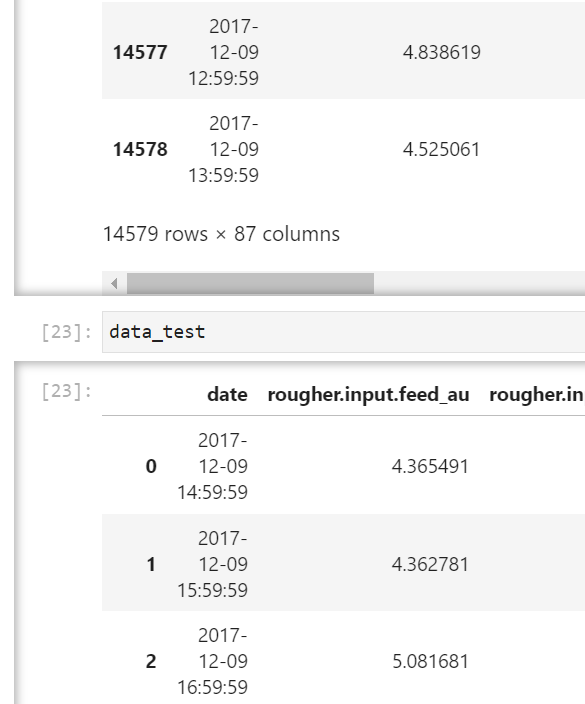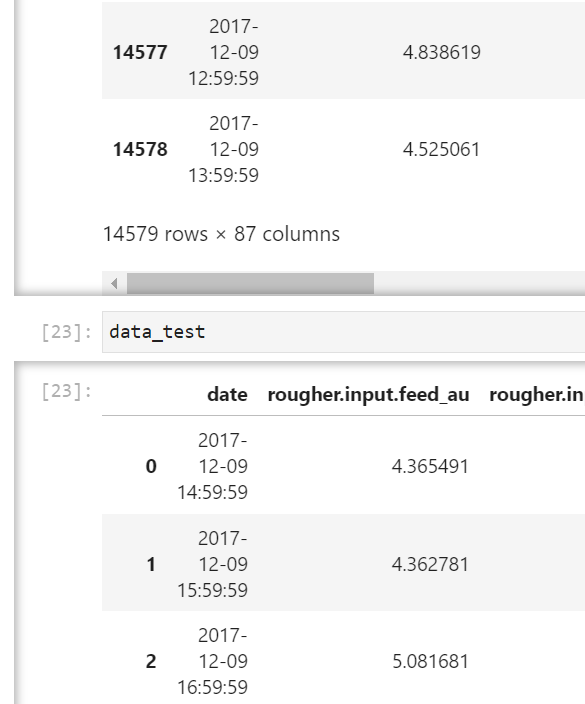

здесь прекрасно видно, что тест это просто часть он фула после 12-09-2017

In [10]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [11]:
data_answ_2 = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'inner', on= 'date')
data_answ_2

date  rougher.input.feed_au  rougher.input.feed_ag  \
0     2017-12-09 14:59:59               4.365491               6.158718   
1     2017-12-09 15:59:59               4.362781               6.048130   
2     2017-12-09 16:59:59               5.081681               6.082745   
3     2017-12-09 17:59:59               5.145949               6.084374   
4     2017-12-09 18:59:59               5.735249               6.165220   
...                   ...                    ...                    ...   
4855  2018-08-18 06:59:59               6.620245               5.992592   
4856  2018-08-18 07:59:59               6.741324               6.158617   
4857  2018-08-18 08:59:59               6.627458               6.015149   
4858  2018-08-18 09:59:59               6.702243               6.097592   
4859  2018-08-18 10:59:59               6.633002               5.908793   

      rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0                  3.875727               39.135119               555.820208   
1                  3.902537               39.713906               544.731687   
2                  4.564078               37.208683               558.155110   
3                  4.768124               36.808874               539.713765   
4                  4.512346               37.810642               558.713584   
...                     ...                     ...                      ...   
4855               2.589242               39.934641               578.654582   
4856               2.647185               40.176307               571.622005   
4857               2.466127               39.841423               563.733146   
4858               2.278955               37.728375               549.812490   
4859               2.440899               36.958540               573.076049   

      rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                   94.544358                           6.146982   
1                  123.742430                           6.210119   
2                   82.610855                           7.363824   
3                   77.984784                           6.927072   
4                   86.434874                           7.823471   
...                       ...                                ...   
4855                63.473450                          14.688804   
4856                62.815291                          14.892720   
4857                61.287347                          13.723692   
4858                59.637037                          13.746510   
4859                58.509262                          13.707775   

      rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                               9.308612                      1196.238112   
1                               9.297709                      1201.904177   
2                               9.003562                      1200.826926   
3                               8.955597                      1199.292489   
4                               7.490356                      1198.005449   
...                                  ...                              ...   
4855                            6.898599                       999.688257   
4856                            6.903204                      1000.479783   
4857                            6.700148                      1000.014718   
4858                            6.706417                       999.635748   
4859                            6.820245                      1000.589156   

      rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                           -299.862743                      1147.248241   
1                           -299.907308                      1154.087804   
2                           -300.124116                      1150.754676   
3                           -299.778385                      1152.512559   
4                           -300.2834

In [12]:
smape(data_answ['rougher.output.recovery'],data_answ_2['rougher.output.recovery'])

0.0

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
я был прав (в противном случае эта функция показала бы знач != 0) , сделал как попросили, но дальше код изменять не буду (использую data_answ , тк это корректно)
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

сразу из полного датасета вытащим таргеты

In [13]:
data_test = data_test.drop('date',axis = 1)
data_train = data_train.drop('date',axis = 1)
data_train

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
0                   6.486150               6.100378               2.284912   
1                   6.478583               6.161113               2.266033   
2                   6.362222               6.116455               2.159622   
3                   6.118189               6.043309               2.037807   
4                   5.663707               6.060915               1.786875   
...                      ...                    ...                    ...   
14574               4.599524               5.822083               4.255546   
14575               4.658125               5.844800               4.241564   
14576               5.335862               6.091855               4.617558   
14577               4.838619               6.121323               4.144989   
14578               4.525061               5.970515               4.020002   

       rougher.input.feed_sol  rougher.input.feed_rate  \
0                   36.808594               523.546326   
1                   35.753385               525.290581   
2                   35.971630               530.026610   
3                   36.862241               542.590390   
4                   34.347666               540.531893   
...                       ...                      ...   
14574               37.480479               559.895089   
14575               37.395565               561.464855   
14576               37.369774               560.889077   
14577               38.591551               559.031805   
14578               40.074026               555.682872   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                    55.486599                          11.986616   
1                    57.278666                          11.971193   
2                    57.510649                          11.920603   
3                    57.792734                          11.630094   
4                    56.047189                          10.957755   
...                        ...                                ...   
14574                85.247019                           6.775864   
14575                83.860651                           6.770561   
14576                85.718304                           7.762770   
14577               119.499241                           7.356687   
14578               122.262690                           6.586020   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                                6.007990                       999.706909   
1                                6.005766                      1000.286398   
2                                6.197377                       999.719565   
3                                6.203177                       999.814770   
4                                6.198826                       999.678690   
...                                   ...                              ...   
14574                            9.005425                      1200.454685   
14575                            9.000889                      1200.958146   
14576                            9.158609                      1199.245914   
14577                            9.304952                      1196.569267   
14578                            9.299606                      1204.866639   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                            -404.066986                      1603.011353   
1                            -400.065196                      1600.754587   
2                            -400.074028                      1599.337330   
3                            -400.200179                      1600.059442   
4                            -399.752729                      1600.208824   
...                                  ...                              ...   
14574                        -300.012582                      1150.6

можно было бы конечно попробовать поискать зависимости от времени суток и тп , но у нас и так очень и очень много фичей , поэтому просто удалим , от этого точность особо не пострадает

In [14]:
FTS_FOR = data_test.columns
FTS_FOR

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_clea

сохраним название фичей на которых будем учить модель определять финальный результат

In [15]:
FTS_ROR = data_test.filter(like="rougher").columns
FTS_ROR

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate'],
      dtype='object')

сохраним название фичей на которых будем учить модель определять результат флотации

In [16]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: rougher.output.recovery, Length: 14579, dtype: float64

In [17]:
data_train.filter(like="rougher")

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
0                   6.486150               6.100378               2.284912   
1                   6.478583               6.161113               2.266033   
2                   6.362222               6.116455               2.159622   
3                   6.118189               6.043309               2.037807   
4                   5.663707               6.060915               1.786875   
...                      ...                    ...                    ...   
14574               4.599524               5.822083               4.255546   
14575               4.658125               5.844800               4.241564   
14576               5.335862               6.091855               4.617558   
14577               4.838619               6.121323               4.144989   
14578               4.525061               5.970515               4.020002   

       rougher.input.feed_sol  rougher.input.feed_rate  \
0                   36.808594               523.546326   
1                   35.753385               525.290581   
2                   35.971630               530.026610   
3                   36.862241               542.590390   
4                   34.347666               540.531893   
...                       ...                      ...   
14574               37.480479               559.895089   
14575               37.395565               561.464855   
14576               37.369774               560.889077   
14577               38.591551               559.031805   
14578               40.074026               555.682872   

       rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                    55.486599                          11.986616   
1                    57.278666                          11.971193   
2                    57.510649                          11.920603   
3                    57.792734                          11.630094   
4                    56.047189                          10.957755   
...                        ...                                ...   
14574                85.247019                           6.775864   
14575                83.860651                           6.770561   
14576                85.718304                           7.762770   
14577               119.499241                           7.356687   
14578               122.262690                           6.586020   

       rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                                6.007990                       999.706909   
1                                6.005766                      1000.286398   
2                                6.197377                       999.719565   
3                                6.203177                       999.814770   
4                                6.198826                       999.678690   
...                                   ...                              ...   
14574                            9.005425                      1200.454685   
14575                            9.000889                      1200.958146   
14576                            9.158609                      1199.245914   
14577                            9.304952                      1196.569267   
14578                            9.299606                      1204.866639   

       rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                            -404.066986                      1603.011353   
1                            -400.065196                      1600.754587   
2                            -400.074028                      1599.337330   
3                            -400.200179                      1600.059442   
4                            -399.752729                      1600.208824   
...                                  ...                              ...   
14574                        -300.012582                      1150.6

In [18]:
data_train['recovery'] = (data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100

In [19]:
data_train['recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: recovery, Length: 14579, dtype: float64

In [20]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [21]:
data_train_mae = smape(data_train['recovery'],data_train['rougher.output.recovery'])
data_train_mae

1.1693431625716644e-14

небольшая погрешность , но в целом всё сходиться

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Тебе следует вычислить эффективность обогащения на обучающей выборке для признака rougher.output.recovery по формуле, указанной в описании к проекту. Далее тебе следует вычислить  MAE между твоими расчётами и значением признака из таблицы. Исправь выводы, пожалуйста.
    
Для расчета MAE можешь воспользоваться библиотекой `sklearn`.
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
повторяю строчку + я проверил на smape , это тоже насколько мне известно корректно
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [22]:
data_train['recovery'] = (data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100

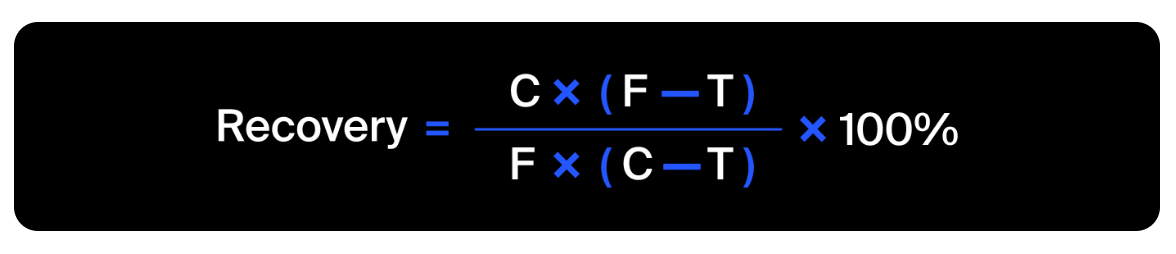

In [23]:
data_train_mae = smape(data_train['recovery'],data_train['rougher.output.recovery'])
data_train_mae

1.1693431625716644e-14

хотите mae , без проблем , но выше как мне кажется всё сделано корректно

In [24]:
mean_absolute_error(data_train['recovery'],data_train['rougher.output.recovery'])

9.83758577644259e-15

где-то есть погрешность на 15 знаке после ","  но я думаю что это можно засчитать за правильные рассчёты

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [25]:
data_train[data_train.columns.difference(FTS_FOR)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14578 non-null  float64
 1   final.output.concentrate_au                         14579 non-null  float64
 2   final.output.concentrate_pb                         14578 non-null  float64
 3   final.output.concentrate_sol                        14387 non-null  float64
 4   final.output.recovery                               14579 non-null  float64
 5   final.output.tail_ag                                14578 non-null  float64
 6   final.output.tail_au                                14579 non-null  float64
 7   final.output.tail_pb                                14504 non-null  float64
 8   final.output.tail_sol                               14574 non-null  float64


In [26]:
data_train.isna().sum().sort_values(ascending = False).head(40)

secondary_cleaner.output.tail_sol                     920
rougher.state.floatbank10_e_air                       429
rougher.input.floatbank11_xanthate                    407
primary_cleaner.output.concentrate_sol                265
final.output.concentrate_sol                          192
rougher.input.feed_size                               101
secondary_cleaner.state.floatbank2_a_air               94
primary_cleaner.output.concentrate_pb                  88
rougher.input.feed_sol                                 77
final.output.tail_pb                                   75
rougher.input.feed_pb                                  72
primary_cleaner.input.xanthate                         61
primary_cleaner.output.tail_sol                        45
rougher.input.floatbank11_sulfate                      36
rougher.input.floatbank10_sulfate                      31
primary_cleaner.input.depressant                       28
primary_cleaner.input.sulfate                          23
secondary_clea

слишком много пропусков , но не все из них нам надо устранять , тк не все комонки участвуют в модели

In [27]:
data_train[FTS_FOR].isna().sum().sort_values(ascending = False).head(40)

rougher.state.floatbank10_e_air               429
rougher.input.floatbank11_xanthate            407
rougher.input.feed_size                       101
secondary_cleaner.state.floatbank2_a_air       94
rougher.input.feed_sol                         77
rougher.input.feed_pb                          72
primary_cleaner.input.xanthate                 61
rougher.input.floatbank11_sulfate              36
rougher.input.floatbank10_sulfate              31
primary_cleaner.input.depressant               28
primary_cleaner.input.sulfate                  23
secondary_cleaner.state.floatbank2_b_air       22
secondary_cleaner.state.floatbank3_a_air       12
rougher.input.feed_rate                         7
rougher.input.floatbank10_xanthate              7
secondary_cleaner.state.floatbank4_a_air        5
primary_cleaner.state.floatbank8_b_air          3
primary_cleaner.state.floatbank8_a_air          3
secondary_cleaner.state.floatbank6_a_air        1
primary_cleaner.state.floatbank8_d_air          1


а вот пропуски в этих колонтах недопутимы , в данном случае не понятно какие зависимости имеют эти колонки и для того чтобы не уменьшать точность модели мы не будем заполнять медианами и тп , а просто удалим , но не более 10% данных

In [28]:
data_train.isna().sum().sort_values(ascending = False).head(2)

secondary_cleaner.output.tail_sol    920
rougher.state.floatbank10_e_air      429
dtype: int64

In [29]:
data_train.shape

(14579, 87)

In [30]:
data_train = data_train.dropna(subset=FTS_FOR)
data_train.shape

(13371, 87)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Обработка пропусков таким способом возможна. Обрати пожалуйста внимание, что все наблюдения представляют собой последовательные измерения, заполнинить пропуски можно и  методами `pandas`: `ffill`/ `bfill`/ интерполяцией , это вполне уместно.\
Хочу посоветовать тебе статью, которая рассматривает разные способы обработки пропусков, выделяет их плюсы и минусы, думаю, тебе может быть интересно: https://loginom.ru/blog/missing   

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
спасибо за статью , обязательно прочту , на практике в хакатонах я убедился , что удаление не всегда, но если не можем точно восстановить данные даёт результаты лучше чем заполнение чем-нибудь 
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [31]:
data_train.isna().sum().sort_values(ascending = False).head(40)

secondary_cleaner.output.tail_sol             748
final.output.concentrate_sol                  176
primary_cleaner.output.concentrate_sol        173
primary_cleaner.output.concentrate_pb          60
primary_cleaner.output.tail_sol                31
final.output.tail_pb                           13
rougher.output.concentrate_sol                 13
primary_cleaner.output.tail_pb                  6
primary_cleaner.output.tail_ag                  4
secondary_cleaner.output.tail_pb                3
final.output.tail_sol                           2
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.tail_ag                            1
rougher.output.tail_ag                          1
secondary_cleaner.state.floatbank2_a_level      0
secondary_cleaner.state.floatbank2_b_level      0
secondary_cleaner.state.floatbank2_b_air        0
secondary_cleaner.state.floatbank3_a_air        0
rougher.input.feed_au                           0


In [32]:
(14579-13371)/14579

0.0828589066465464

отлично , избавили от пропусков в нужных колонках и при этом удалили <10% строчек

вывод: 
<br>все столбики кроме date имеют тип float (но нам это не особо важно тк мы удалили столбец) 
<br>в столбцах которые будем использовать для построение моделей устранили пропуски(8%) , также остался 1 столбец с ощутимым количеством пропусков (secondary_cleaner.output.tail_sol ) и 14 столбцов с небольшим количеством пропусков
<br>причины пропусков точно установлены не были. Одна из версий: не все партии продукта удаются (нарушение технологического процесса или сбой аппаратуры) + как мы знаем системы измерений сейчас не идеальны и могут давать сбой из-за чего получаются пропуски
<br>ответ на вопрос 1.3 ) в train отсутсвуют столбцы output и calculate , и впринципе это логично в противном случае была бы утечка таргета
<br>явные дубликаты отсутствуют 
<br>странных значений обнаружено не было

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, ведь их невозможно получить либо замерить во время выполнения технологического процесса

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
ну или так да)
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Анализ данных

In [33]:
FTS_AG = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']

In [34]:
FTS_AU = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']

In [35]:
FTS_PB = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']

In [36]:
data_ag = data_train[FTS_AG]

In [37]:
data_au = data_train[FTS_AU]

In [38]:
data_pb = data_train[FTS_PB]

scatter_matrix


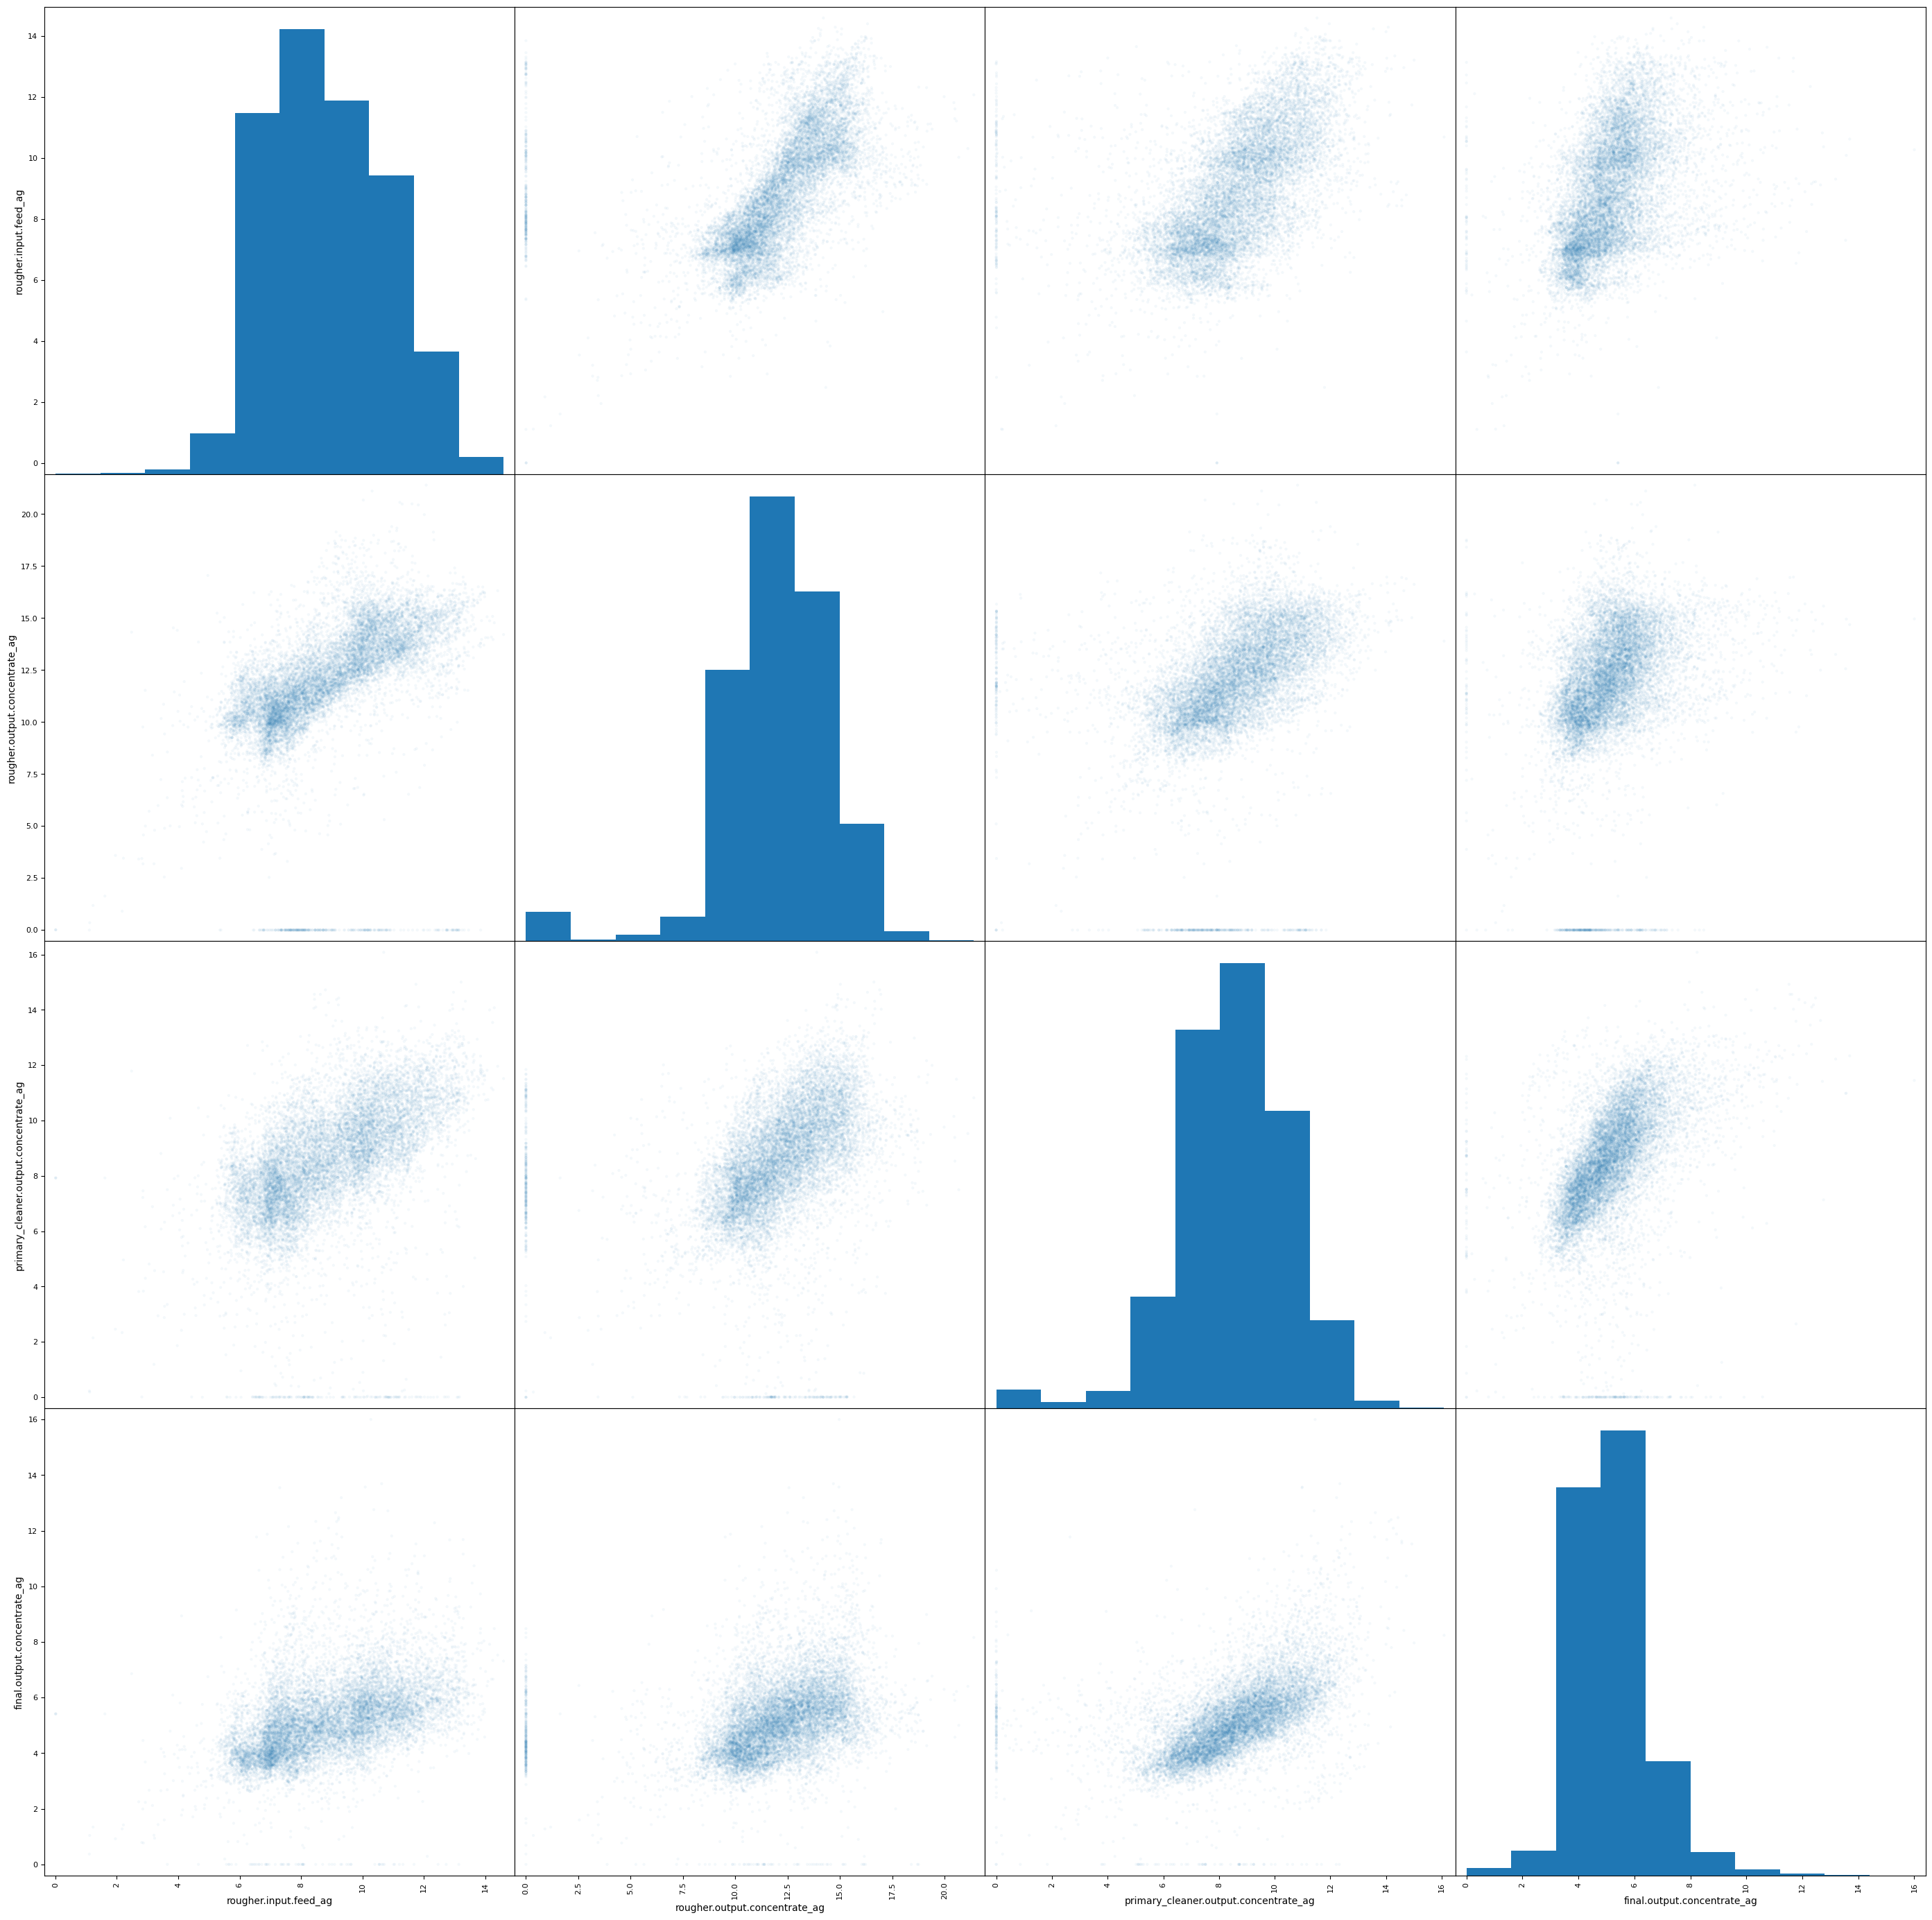

In [39]:
print('scatter_matrix')
pd.plotting.scatter_matrix(data_ag,figsize=(35,35),alpha=0.05)
plt.show()

вывод по содержанию серебра на разных этапах производства: 
<br>общее наблюдение: все металлы имеют нормальное распределение на всех этапах производства и стандартное отклонение уменьшается.Также имеет хвост из 0, причины их появления неудачные партии 
<br>серебро : на входе средняя концентрация 8 => после флонтации %содержание увеличивается до 10-12 => во время очистки(1,2) золото концентрация плавно уменьшается до 5% 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Видно, что золото растёт в концентрации - это здорово!) А серебро падает - ведь наша цель -  золото, верно?)
А свинец - это побочный элемент химических реакций, по этой причине немного и увеличивается его концентрация

scatter_matrix


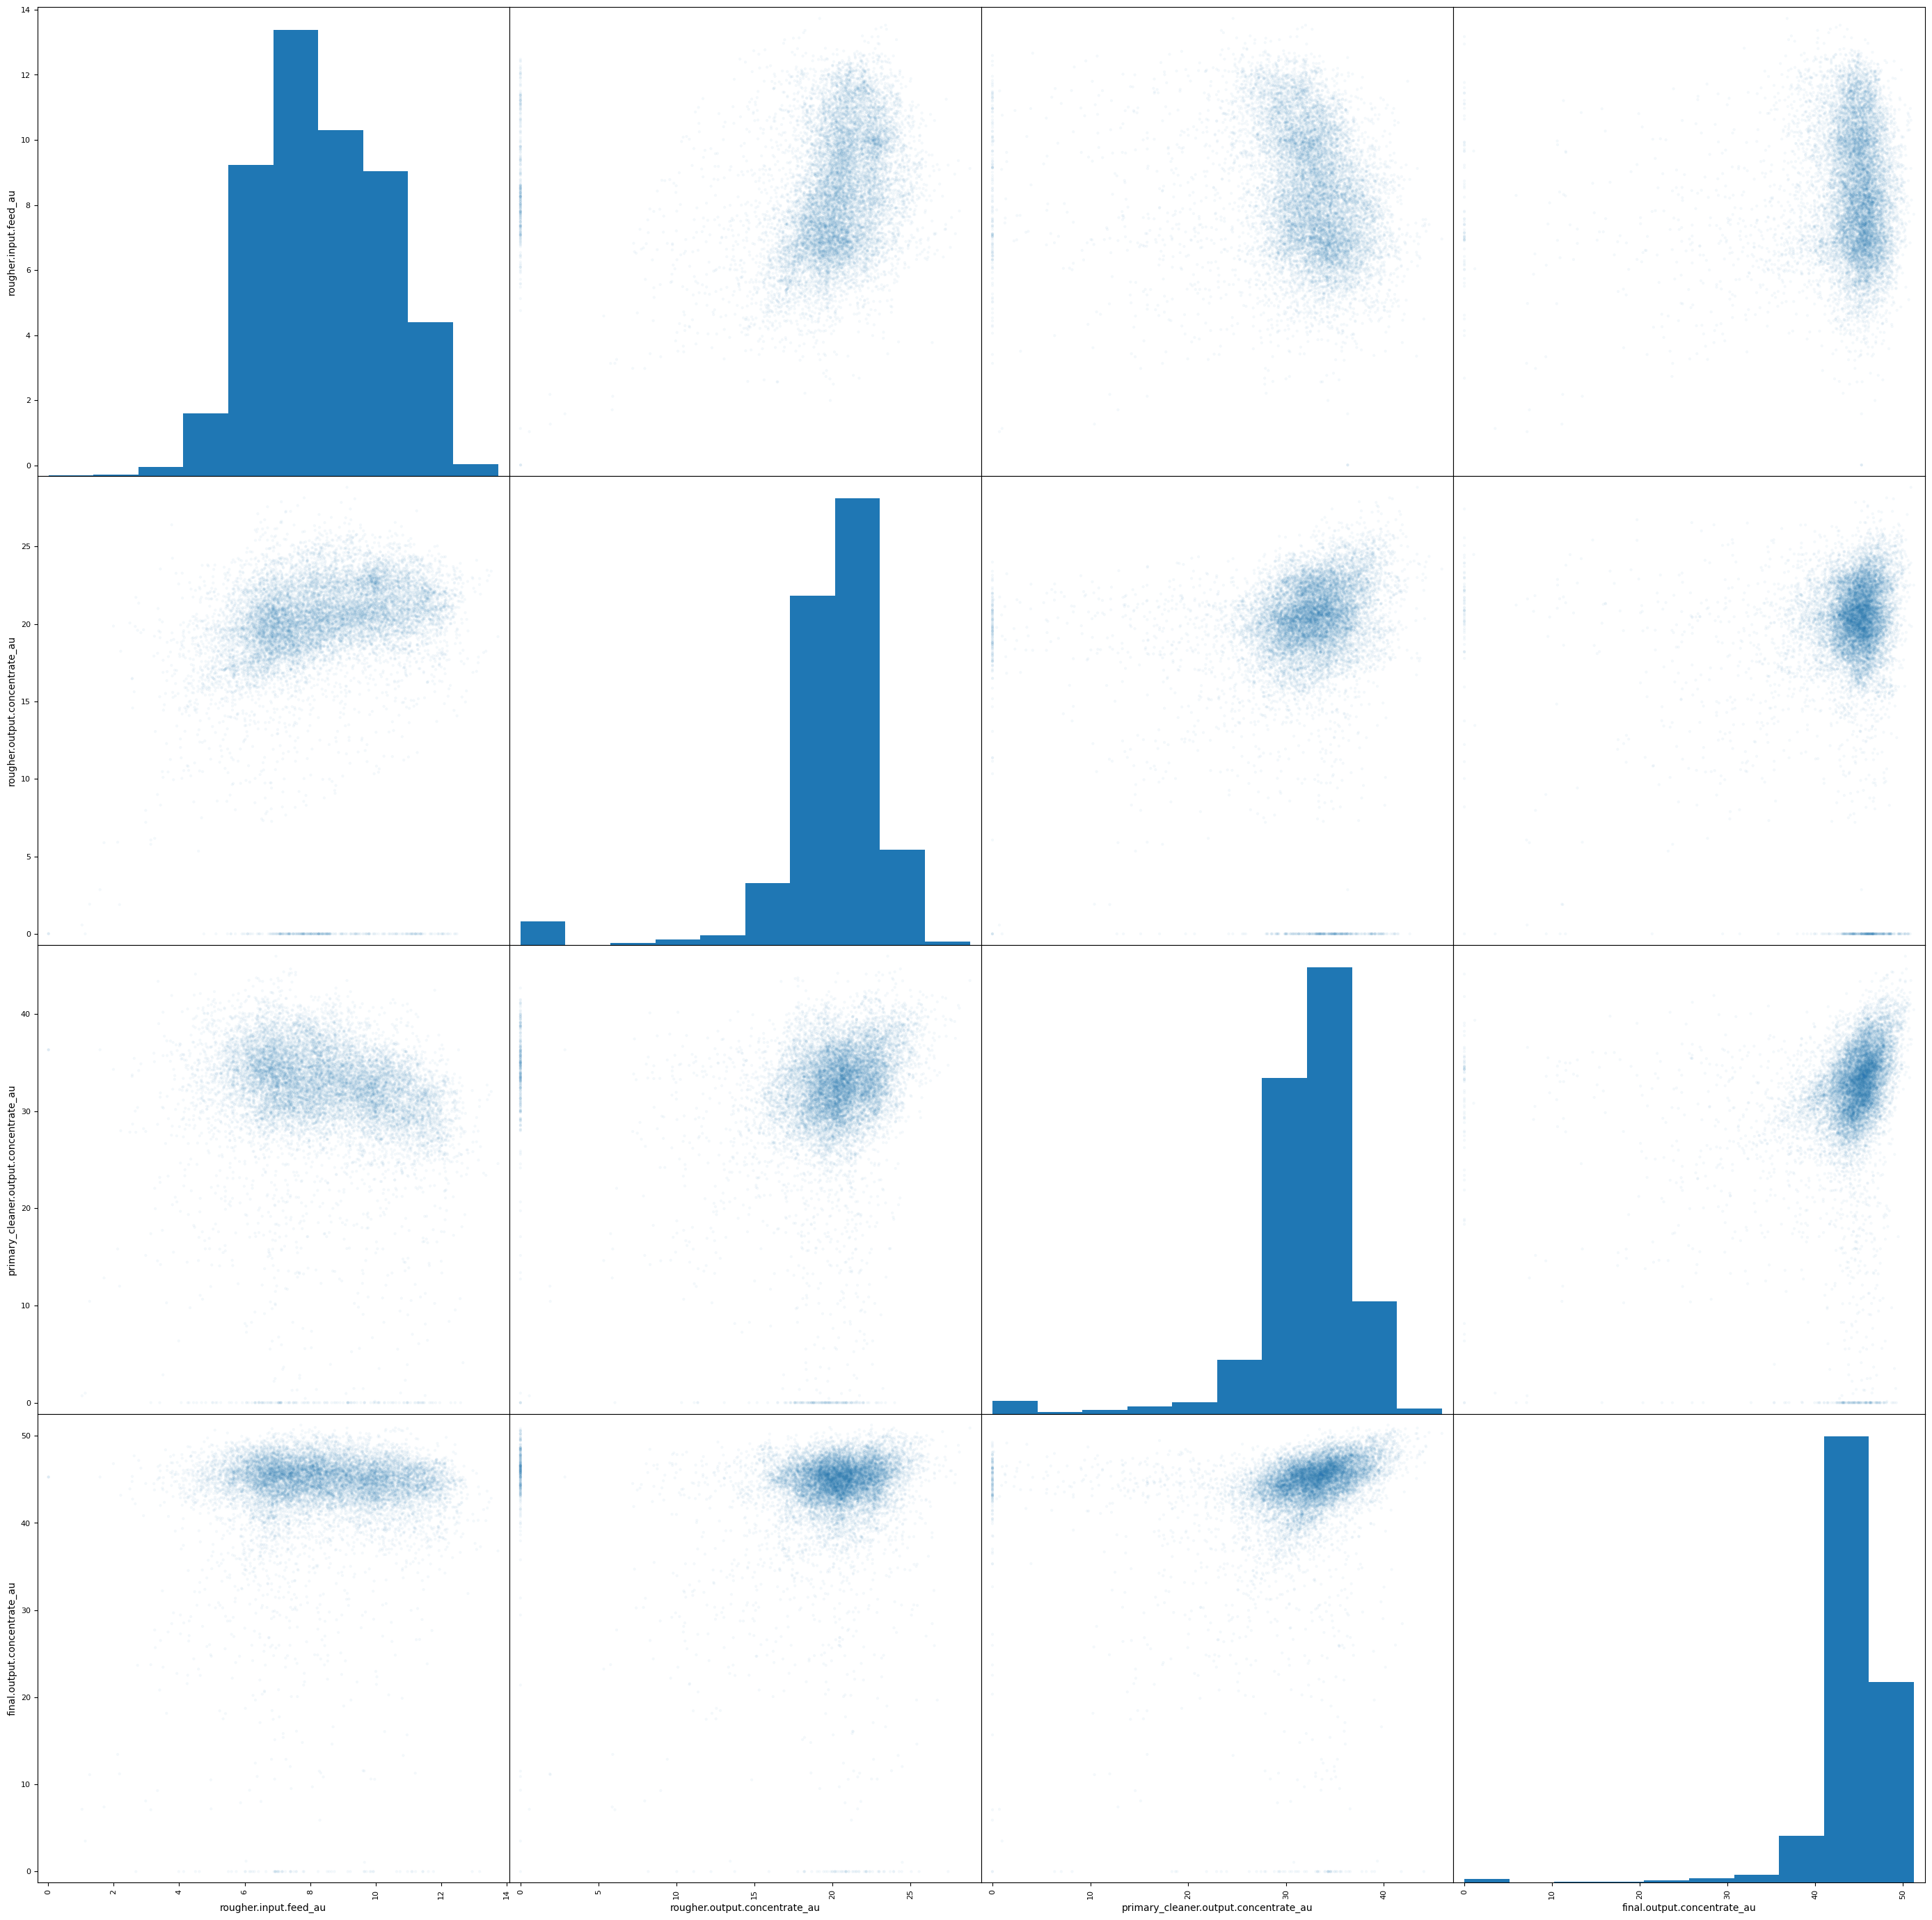

In [40]:
print('scatter_matrix')
pd.plotting.scatter_matrix(data_au,figsize=(35,35),alpha=0.05)
plt.show()

вывод по содержанию золота на разных этапах производства: 
<br>серебро : на входе средняя концентрация 8 как и у серебра => после флонтации %содержание увеличивается в несколько раз до 20 => во время очистки(1,2) золото концентрация плавно увеличивается до 40+% 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Видно, что золото растёт в концентрации - это здорово!) А серебро падает - ведь наша цель -  золото, верно?)
А свинец - это побочный элемент химических реакций, по этой причине немного и увеличивается его концентрация

In [41]:
print('scatter_matrix')
pd.plotting.scatter_matrix(data_pb,figsize=(35,35),alpha=0.05)
plt.show()

scatter_matrix


вывод по содержанию свинца на разных этапах производства: 
<br>серебро : на входе средняя концентрация 3 самая маленькая концентрация из всех металлов => после флонтации %содержание увеличивается в несколько раз до 8 => во время очистки(1,2) коцентрация имеет схожие значения в районе 10

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Видно, что золото растёт в концентрации - это здорово!) А серебро падает - ведь наша цель -  золото, верно?)
А свинец - это побочный элемент химических реакций, по этой причине немного и увеличивается его концентрация

<AxesSubplot: ylabel='Frequency'>

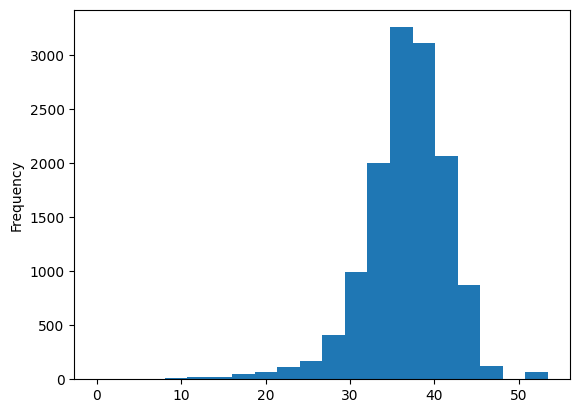

In [42]:
data_train['rougher.input.feed_sol'].plot(kind = 'hist' , bins = 20)

<AxesSubplot: ylabel='Frequency'>

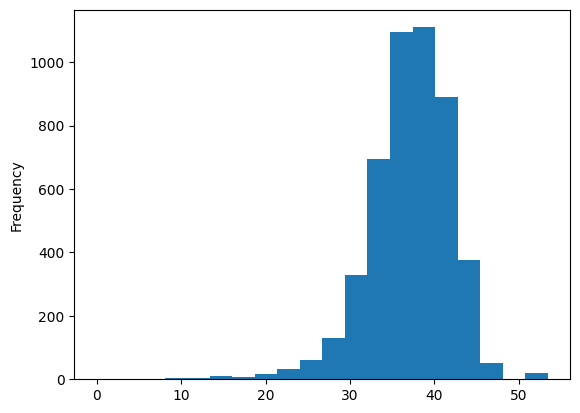

In [43]:
data_test['rougher.input.feed_sol'].plot(kind = 'hist' , bins = 20)

вывод по распределению размеров гранул исходного сырья:
распредения train и test идентичны => результаты будут корректны

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

Распределения примерно одинаковы. Для сравнения распределений выборок с разным размером лучше использовать графики плотности или kde вместо гистограмм частотности (по оси У доля относительно датасета вместо абсолютного количества). Наличие либо отсутствие разницы будет более очевидным.  Рекомендую тебе нормализовать гистограммы, например используя метод `sns.kdeplot`

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
хм, мне показалось что они почти как братья близнецы , сейчас удостоверимся
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [44]:
ax = sns.kdeplot(data = data_train['rougher.input.feed_sol'])
sns.kdeplot(data = data_test['rougher.input.feed_sol'],ax = ax)
plt.show()

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
согласен , так правильнее
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [45]:
data_train['recovery'] = data_train['rougher.output.tail_au'] * data_train['rougher.output.concentrate_au'] * data_train['rougher.input.feed_au']

C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\3809750545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['recovery'] = data_train['rougher.output.tail_au'] * data_train['rougher.output.concentrate_au'] * data_train['rougher.input.feed_au']


In [46]:
data_train['rougher.input.feed_all'] = data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb']
data_train['rougher.output.concentrate_all'] = data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb']
data_train['primary_cleaner.output.concentrate_all'] = data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_pb']
data_train['final.output.concentrate_all'] = data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] 

C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\3582383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['rougher.input.feed_all'] = data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb']
C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\3582383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['rougher.output.concentrate_all'] = data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] 

In [47]:
data_train['rougher.input.feed_all'].plot(kind = 'hist' , bins = 20)

<AxesSubplot: ylabel='Frequency'>

<AxesSubplot: ylabel='Frequency'>

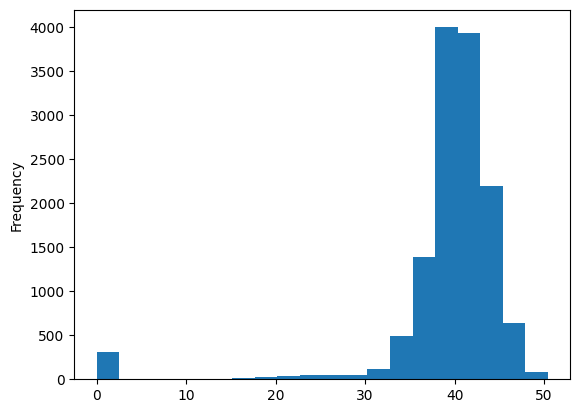

In [48]:
data_train['rougher.output.concentrate_all'].plot(kind = 'hist' , bins = 20)

<AxesSubplot: ylabel='Frequency'>

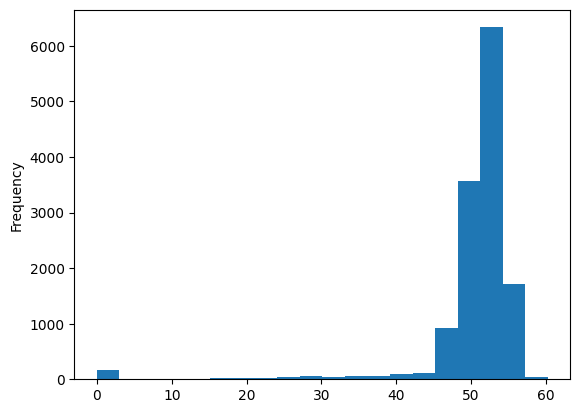

In [49]:
data_train['primary_cleaner.output.concentrate_all'].plot(kind = 'hist' , bins = 20)

<AxesSubplot: ylabel='Frequency'>

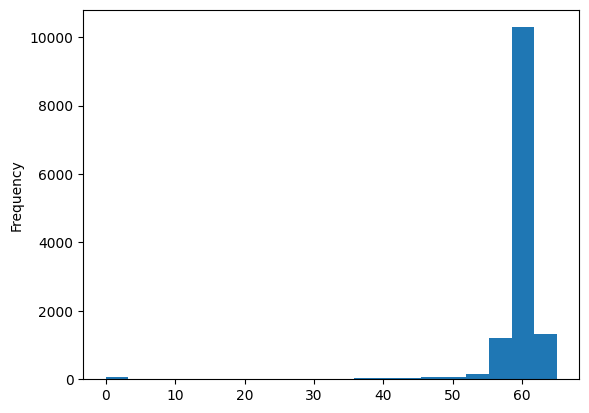

In [50]:
data_train['final.output.concentrate_all'].plot(kind = 'hist' , bins = 20)

вывод по общему содержанию металлов:
<br>общее наблюдение: все металлы имеют нормальное распределение на всех этапах производства и стандартное отклонение уменьшается.Также имеет хвост из 0, причины их появления неудачные партии 
в течение флонтации и очисток общее содержание металлов очень сильно вырастает с 20% до 60%

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Итак, суммарную концентрацию всех веществ на разных стадиях исследовали. Есть такой момент, что на гистограммах распределений суммарных концентраций имеются аномалии, и эти аномалии важно удалить по всем типам суммарных концентраций на обучающей выборке. Ведь отдельно по каждому веществу они могут быть (не всегда же есть крупинки золота в руде), а вот суммарно - вряд ли (в руде хоть что-то но будет) А если мы имеем аномалии, значит большая вероятность неточности в измерениях. Исправь, пожалуйста 


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
ну не прямо аномалия , могли не соблюсти тех процесс , но давайте удалим
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [51]:
data_train.shape

(13371, 91)

In [52]:
data_train = data_train[data_train['final.output.concentrate_all'] != 0]
data_train.shape

(13307, 91)

не велика потеря)

## Модель

In [53]:
#X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(data_train[FTS_FOR], data_train['final.output.recovery'], test_size=0.25, random_state=1)
#X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(data_train[FTS_ROR], data_train['rougher.output.recovery'], test_size=0.25, random_state=1)

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> В нашем проекте некорректно использовать train_test_split для разбиение на выборки. Сравнение моделей следует провести на кросс-валидации `grid.best_score_` 
    


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
полностью согласен
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [54]:
X_0_train, y_0_train = data_train[FTS_FOR] , data_train['final.output.recovery']
X_1_train, y_1_train = data_train[FTS_ROR] , data_train['rougher.output.recovery']

In [55]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    #"RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    #"GaussianProcessRegressor": GaussianProcessRegressor(),
    #"SVR": SVR(),
    #"NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    #"KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    #"TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

протестируем разные модели

In [56]:
smape_score = make_scorer(smape, greater_is_better= False )

сделаем свою метрику

In [57]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'smape', 'smape_cv'])
for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_0_train, y_0_train)
    scores = cross_val_score(model, 
                             X_0_train, 
                             y_0_train,
                             scoring=smape_score, 
                             cv=5)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'smape_cv': round(np.mean(-scores))
    }
    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* DecisionTreeRegressor


C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* LinearSVR


C:\ana\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ana\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ana\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ana\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ana\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ana\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: Future

* LinearRegression
* Ridge


C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* Lars
* HuberRegressor


C:\ana\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ana\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ana\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

* PassiveAggressiveRegressor
* ARDRegression


C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* BayesianRidge


C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_20492\2876914598.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
К шагу тестирования мы приходим с ОДНОЙ лучшей моделью, выбранной в шаге обучения различных моделей. Сейчас модели сразу проверяются на тестовой выборке, однако, тестовая выборка должна использоваться только для итоговой оценки качества ОДНОЙ модели - победителя с шага обучения И ТОЛЬКО В ШАГЕ ТЕСТИРОВАНИЯ, первая - для чернового концентрата, вторая - для финального (константную модель (dummy) тоже можно в шаге проверки адекватности). Исправь, пожалуйста.  Ниже - аналогично

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
это были лишь названия , ну впринципе понимаю могло запутать , сейчас убрал "тестовую выборку", а одна модель ниже
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [58]:
df_models.head(20).sort_values(by='smape_cv', ascending=True)

model run_time smape smape_cv
8                ARDRegression     0.01   NaN        8
3             LinearRegression      0.0   NaN        9
4                        Ridge      0.0   NaN        9
6               HuberRegressor     0.04   NaN        9
9                BayesianRidge      0.0   NaN        9
10                  ElasticNet     0.23   NaN        9
11   OrthogonalMatchingPursuit      0.0   NaN        9
2                    LinearSVR     0.19   NaN       10
0                 XGBRegressor     0.21   NaN       11
1        DecisionTreeRegressor     0.08   NaN       14
7   PassiveAggressiveRegressor      0.0   NaN       14
5                         Lars      0.0   NaN       88

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
а сейчас вообще получается что линейка лучше, но я уже модели не буду переделывать
</div> 

XGBRegressor показал себя лучше всего , немного удивлён , думал здесь линейные модели себя проявят лучше (но справедливости ради я не посмотрел кореляции , может там собака и зарыта)

In [59]:
# param_grid = dict(
#     n_jobs=[16],
#     learning_rate=[0.1, 0.5],
#     objective=['reg:squarederror'],
#     max_depth=[5, 10, 15], 
#     n_estimators=[100],
#     subsample=[0.2, 0.8, 1.0],
#     gamma=[0.05, 0.5],
#     scale_pos_weight=[0, 1],
#     reg_alpha=[0, 0.5],
#     reg_lambda=[1, 0],
# )

# model = XGBRegressor(random_state=1, verbosity=1)

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=param_grid,
#                            scoring=smape_score,
#                            )

# best_model = grid_search.fit(X_0_train, y_0_train)
# print('Optimum parameters', best_model.best_params_)

можно сделать подбор параметров , но мы не на хакатоне и не на работе чтобы за сотые бороться

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
а вот теперь лучшие модели
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [60]:
preprocessor_for = ColumnTransformer(transformers =[
    ('std',StandardScaler(), data_train[FTS_FOR].select_dtypes(include='number').columns),
    ], remainder ='passthrough'
)

pipe_for = Pipeline([
    ("prepro", preprocessor_for),
    ("clf",XGBRegressor(random_state=1, verbosity=1))
])

надо лучше разобраться с XGBRegressor , такое ощущение что он сам делает std 

In [61]:
pipe_for.fit(X_0_train,y_0_train)
m0p = pipe_for.predict(data_test)

In [62]:
preprocessor_ror = ColumnTransformer(transformers =[
    ('std',StandardScaler(), data_train[FTS_ROR].select_dtypes(include='number').columns),
    ], remainder ='passthrough'
)

pipe_ror = Pipeline([
    ("prepro", preprocessor_ror),
    ("clf",XGBRegressor(random_state=1, verbosity=1))
])

In [63]:
pipe_ror.fit(X_1_train,y_1_train)
m1p = pipe_ror.predict(data_test[FTS_ROR])

In [64]:
sm_for = smape(m0p,data_answ['final.output.recovery'])

In [65]:
sm_ror = smape(m1p,data_answ['rougher.output.recovery'])

In [66]:
sm_final = sm_ror*0.25 + sm_for*0.75
sm_final

6.140943677411724

средняя ошибка 6,1% , не лучшее что мог сделать , но всё же не плохо

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Тестирование лучшей модели проведено 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
В каждом проекте при оценке качества модели, имеет смысл сравнивать ее с константной моделью (к примеру, которая предсказывает медиану по таргету). И в наш проект важно добавить это сравнение.  Создавать константные модели можно либо вручную, либо воспользоваться готовым алгоритмом <a href='https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html'>DummyRegressor</a> из пакета `sklearn`. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [67]:
dummy_regr1 = DummyRegressor(strategy="mean")
dummy_regr1.fit(X_0_train,y_0_train)
dummy_regr1 = dummy_regr1.predict(data_test)
sm_for_d = smape(dummy_regr1,data_answ['final.output.recovery'])
sm_for_d

9.25928194721347

результат куда хуже 

In [68]:
dummy_regr2 = DummyRegressor(strategy="mean")
dummy_regr2.fit(X_1_train,y_1_train)
dummy_regr2 = dummy_regr2.predict(data_test[FTS_ROR])
sm_ror_d = smape(dummy_regr2,data_answ['rougher.output.recovery'])
sm_ror_d

6.893808321072458

In [69]:
sm_final = sm_ror_d*0.25 + sm_for_d*0.75
sm_final

8.667913540678217

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
разница значений присутствует , модель адекватна
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<b>вывод:</b>
<br>основная информация с которой мы работали это столбцы rougher.output.recovery и final.output.recovery (целевые переменные) , также задействовали все столбцы кроме расчётных и некоторых output
<br>итог эксперементов с моделями:на данный момент градиентный бустинг из XGBoost в итоге получили (sMAPE = 6.1%) 
<br>линеная регрессия , думал в этой задаче зайдёт лучше , но она показала себя хуже градиентного бустинга

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким объемным и сложным проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована кросс-валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в ML, то могу посоветовать тебе: 
    
- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/   
    
- Книжка от ШАД: https://academy.yandex.ru/handbook/ml/
    
- Также рекомендую лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN
- Избежать утечки данных при кросс-валидации тебе поможет <a href="https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f">конвеерная обработка данных</a>.     
    
- Не все признаки приносят пользу при моделировании. Инструмент <a href="https://proglib.io/p/feature-selector">FeatureSelector</a> поможет тебе отобрать важные признаки и избавит от ручной обработки.  Также можешь посмотреть статью на <a href="https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook">Kaggle</a> (она сложнее).    
    
    
В этом проекте были отработаны несколько моментов. А самый очевидный: заметно, что разность метрик качества (константной и нашей модели) -  не слишком большая. Такое расхождение метрик допустимо в этом проекте. Что тогда  для дальнейшего улучшения качества моделирования возможно тут пересмотреть?
Попробую описать для тебя:
1. Качество данных на входе модели машинного обучения: повторно оценить аномалии, пропуски, соответствие законам химии и физики, все ли правдоподобно?
2. Работа с моделями машинного обучения:
- Создание новых признаков для моделей, Features Engineering: возможно стоит обратиться к технологу производства и ещё раз пробежаться по бизнес-цепочке процесса.
- Отбор самих моделей машинного обучения и гиперпараметров.
    
3. Параметры производственного процесса, к примеру: температура сырья, скорость ленточного конвейера, и.т.п.
    

Если провести Анализ измерительных систем, или MSA, то можно разобраться в причинах неточности полученных с производства данных. Статистический анализ данных, или SPC, - тоже будет являться незаменимым помощником в решении нашей задачи.
    
Добавлю здесь, что цель нашего проекта достигнута, а именно пройдены важные этапы подготовки данных и построения модели для производства золота.
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>